In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import batt_cycle

Goal: Develop a function that break the cycle indeces up appropriately such that charge/discharge data are appropriately paired

def pull_cycle(cycle_num, cycle_indeces, df_break):  
&nbsp;&nbsp;&nbsp;&nbsp; pairs up charge/discharge so that calling cycle 1 give charge+discharge1  
&nbsp;&nbsp;&nbsp;&nbsp; return list where each index is two lists containing data indeces
    

In [126]:
# folder holding data of interest
folder = '../Data/Li-Li/Data_2_7_19/'

# imports and concatenates the data for each of the 10 symmetric cells
PP_A_0 = batt_cycle.import_data(folder + '_002_4_nodrop.xls', 3)
# cleans and preps dataframes for plotting
PP_A, PP_A_break = batt_cycle.clean_prep_break(PP_A_0)

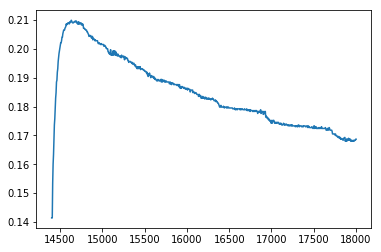

In [127]:
cycle_indeces = batt_cycle.return_cylce_indeces(2, PP_A_break)

cycle_data = PP_A[PP_A.index.isin(cycle_indeces)]
plt.plot(cycle_data['time_sec'], cycle_data['voltage'])

In [20]:
def return_cycle_indeces_v2(df_break):
    """docstring"""
    cycle_data = []
    start = df_break[cycle - 1] + 2
    end = df_break[cycle] - 1
    cycle_index = np.arange(start, end)
    return cycle_index

In [27]:
print(len(df_break))
print(df_break)


194
[1, 485, 1209, 1933, 2657, 3382, 4106, 4828, 5552, 6276, 7000, 7724, 8448, 9172, 9896, 10620, 11344, 12068, 12793, 13517, 14241, 14965, 15689, 16413, 17137, 17861, 18585, 19309, 20033, 20757, 21481, 22205, 22929, 23653, 24377, 25101, 25825, 26549, 27273, 27997, 28721, 29445, 30169, 30893, 31617, 32341, 33065, 33789, 34513, 35237, 35961, 36685, 37409, 38133, 38857, 39581, 40305, 41029, 41753, 42477, 43201, 43925, 44621, 45345, 46069, 46793, 47517, 48241, 48965, 49689, 50413, 51137, 51861, 52585, 53309, 54033, 54757, 55481, 56205, 56929, 57652, 58376, 59100, 59824, 60548, 61272, 61996, 62720, 63444, 64168, 64892, 65616, 66340, 67064, 67788, 68512, 69236, 69960, 70684, 71408, 72132, 72856, 73580, 74304, 75028, 75751, 76459, 77183, 77907, 78631, 79355, 80079, 80803, 81527, 82251, 82975, 83699, 84423, 85147, 85871, 86595, 87319, 88043, 88767, 89491, 90215, 90939, 91663, 92387, 93094, 93818, 94542, 95266, 95990, 96714, 97438, 98162, 98886, 99592, 100316, 101040, 101764, 102488, 103212, 1

In [144]:
df_break = PP_A_break
rest = True

cycle_indeces = []
# saves rest data as index[0], if no rest saves None
if rest == True:
    start = df_break[0] + 2
    end = df_break[1] - 1
    rest_index = np.arange(start, end)
    cycle_indeces.append(rest_index)
    num_cycles = (len(df_break)-2)//2
    if len(df_break) % 2 == 0:
        drop_partial = True
    elif len(df_break) % 2 != 0:
        drop_partial = False
    if drop_partial == True:
        for i in np.arange(1, len(df_break)-1, 2):
            charge_start = df_break[i]+2
            charge_end = df_break[i+1]-1
            charge_index = np.arange(charge_start, charge_end)
            discharge_start = df_break[i+1]+2
            discharge_end = df_break[i+2]-1
            discharge_index = np.arange(discharge_start, discharge_end)
            full_cycle_index = [charge_index, discharge_index]
            cycle_indeces.append(full_cycle_index)
    elif drop_partial == False:
        for i in np.arange(1, len(df_break)-3, 2):
            charge_start = df_break[i]+2
            charge_end = df_break[i+1]-1
            charge_index = np.arange(charge_start, charge_end)
            discharge_start = df_break[i+1]+2
            discharge_end = df_break[i+2]-1
            discharge_index = np.arange(discharge_start, discharge_end)
            full_cycle_index = [charge_index, discharge_index]
            cycle_indeces.append(full_cycle_index)
        i = len(df_break)-3
        charge_start = df_break[i]+2
        charge_end = df_break[i+1]-1
        charge_index = np.arange(charge_start, charge_end)
        discharge_start = df_break[i+1]+2
        discharge_end = df_break[-1]
        discharge_index = np.arange(discharge_start, discharge_end)
        full_cycle_index = [charge_index, discharge_index]
        cycle_indeces.append(full_cycle_index)
elif rest == False:
    cycle_indeces.append('No Rest')
    num_cycles = (len(df_break)-1)//2
    if len(df_break) % 2 == 0:
        drop_partial = False
    elif len(df_break) % 2 != 0:
        drop_partial = True
    pass




In [146]:
print('num_cycle = {}'.format(num_cycles))
print('rest = {}'.format(rest))
print('drop_partial = {}'.format(drop_partial))
print('len(cycle_indeces) = {}'.format(len(cycle_indeces)))
cycle_indeces[96]

num_cycle = 95
rest = True
drop_partial = False
len(cycle_indeces) = 97


[array([137253, 137254, 137255, 137256, 137257, 137258, 137259, 137260,
        137261, 137262, 137263, 137264, 137265, 137266, 137267, 137268,
        137269, 137270, 137271, 137272, 137273, 137274, 137275, 137276,
        137277, 137278, 137279, 137280, 137281, 137282, 137283, 137284,
        137285, 137286, 137287, 137288, 137289, 137290, 137291, 137292,
        137293, 137294, 137295, 137296, 137297, 137298, 137299, 137300,
        137301, 137302, 137303, 137304, 137305, 137306, 137307, 137308,
        137309, 137310, 137311, 137312, 137313, 137314, 137315, 137316,
        137317, 137318, 137319, 137320, 137321, 137322, 137323, 137324,
        137325, 137326, 137327, 137328, 137329, 137330, 137331, 137332,
        137333, 137334, 137335, 137336, 137337, 137338, 137339, 137340,
        137341, 137342, 137343, 137344, 137345, 137346, 137347, 137348,
        137349, 137350, 137351, 137352, 137353, 137354, 137355, 137356,
        137357, 137358, 137359, 137360, 137361, 137362, 137363, 

In [113]:
x = np.arange(1, len(df_break)-3, 2)
print(x)
print(len(x))

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189]
95


In [139]:
np.arange(1, len(df_break), 2)

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191])

In [131]:
len(df_break)

193

138699

To do: 
Correct number of cycles variable. Not used for anything in the code but currently it is wrong.